<a href="https://colab.research.google.com/github/Swetha-0308/Cognifyz_DataScience_internship/blob/main/Cognifyz_level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Level 3 - Task 1**

# predictive Modeling( Task 1 )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Dataset .csv')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
data.shape

(9551, 21)

In [ ]:
data= pd.get_dummies(data, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant ID            9551 non-null   int64  
 1   Restaurant Name          9551 non-null   object 
 2   Country Code             9551 non-null   int64  
 3   City                     9551 non-null   object 
 4   Address                  9551 non-null   object 
 5   Locality                 9551 non-null   object 
 6   Locality Verbose         9551 non-null   object 
 7   Longitude                9551 non-null   float64
 8   Latitude                 9551 non-null   float64
 9   Cuisines                 9542 non-null   object 
 10  Average Cost for two     9551 non-null   int64  
 11  Currency                 9551 non-null   object 
 12  Is delivering now        9551 non-null   object 
 13  Switch to order menu     9551 non-null   object 
 14  Price range             

In [ ]:
data['Has Table booking_Yes'] = data['Has Table booking_Yes'].astype('uint8')
data['Has Online delivery_Yes'] = data['Has Online delivery_Yes'].astype('uint8')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant ID            9551 non-null   int64  
 1   Restaurant Name          9551 non-null   object 
 2   Country Code             9551 non-null   int64  
 3   City                     9551 non-null   object 
 4   Address                  9551 non-null   object 
 5   Locality                 9551 non-null   object 
 6   Locality Verbose         9551 non-null   object 
 7   Longitude                9551 non-null   float64
 8   Latitude                 9551 non-null   float64
 9   Cuisines                 9542 non-null   object 
 10  Average Cost for two     9551 non-null   int64  
 11  Currency                 9551 non-null   object 
 12  Is delivering now        9551 non-null   object 
 13  Switch to order menu     9551 non-null   object 
 14  Price range             

In [ ]:
data.loc[:, ['Has Table booking_Yes', 'Has Online delivery_Yes']]

,Has Table booking_Yes,Has Online delivery_Yes
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
9546,0,0
9547,0,0
9548,0,0
9549,0,0


In [ ]:
features = ['Average Cost for two', 'Votes', 'Price range','Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'
x= data[features]
y= data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
models={
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model:{model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-----------------------------------")

Model:Linear Regression
Mean Squared Error: 1.6764802747031442
R-squared: 0.2634446409021949
-----------------------------------
Model:Decision Tree
Mean Squared Error: 0.20543580054758603
R-squared: 0.9097425468542027
-----------------------------------
Model:Random Forest
Mean Squared Error: 0.13545729857881872
R-squared: 0.9404873408279097
-----------------------------------


In [ ]:
y_test

4731    2.1
1468    4.1
9037    3.2
7866    4.4
5570    3.5
       ... 
8149    2.6
5849    0.0
9019    3.1
742     4.2
180     4.3
Name: Aggregate rating, Length: 1911, dtype: float64

In [ ]:
y_pred

array([2.87135   , 3.65305833, 3.15702143, ..., 3.14553492, 3.883     ,
       4.05      ])

**Level 3 - Task 2**

# Customer Preference Analysis( Task 2 )

In [ ]:
cuisine_ratings= data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings

,Cuisines,Aggregate rating
0,Afghani,0.725
1,"Afghani, Mughlai, Chinese",0.000
2,"Afghani, North Indian",0.000
3,"Afghani, North Indian, Pakistani, Arabian",0.000
4,African,4.700
...,...,...
1820,"Western, Asian, Cafe",4.200
1821,"Western, Fusion, Fast Food",3.200
1822,World Cuisine,4.900
1823,"World Cuisine, Mexican, Italian",4.400


In [ ]:
cuisine_ratings_top = cuisine_ratings.head(10)
cuisine_ratings_top

,Cuisines,Aggregate rating
0,Afghani,0.725000
1,"Afghani, Mughlai, Chinese",0.000000
2,"Afghani, North Indian",0.000000
3,"Afghani, North Indian, Pakistani, Arabian",0.000000
4,African,4.700000
5,"African, Portuguese",4.200000
6,American,3.667742
7,"American, Asian, Burger",4.600000
8,"American, Asian, European, Seafood",4.600000
9,"American, Asian, Italian, Seafood",4.500000


In [ ]:
cuisine_ratings_top_sort = cuisine_ratings_top.sort_values(by='Aggregate rating', ascending=False)
cuisine_ratings_top_sort

,Cuisines,Aggregate rating
4,African,4.700000
7,"American, Asian, Burger",4.600000
8,"American, Asian, European, Seafood",4.600000
9,"American, Asian, Italian, Seafood",4.500000
5,"African, Portuguese",4.200000
6,American,3.667742
0,Afghani,0.725000
1,"Afghani, Mughlai, Chinese",0.000000
2,"Afghani, North Indian",0.000000
3,"Afghani, North Indian, Pakistani, Arabian",0.000000


<ipython-input-23-9e9216887dd1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cuisine_ratings_top_sort,x='Cuisines', y='Aggregate rating', palette='viridis') # Changed 'cuisine_ratings_top_sort' to cuisine_ratings_top_sort


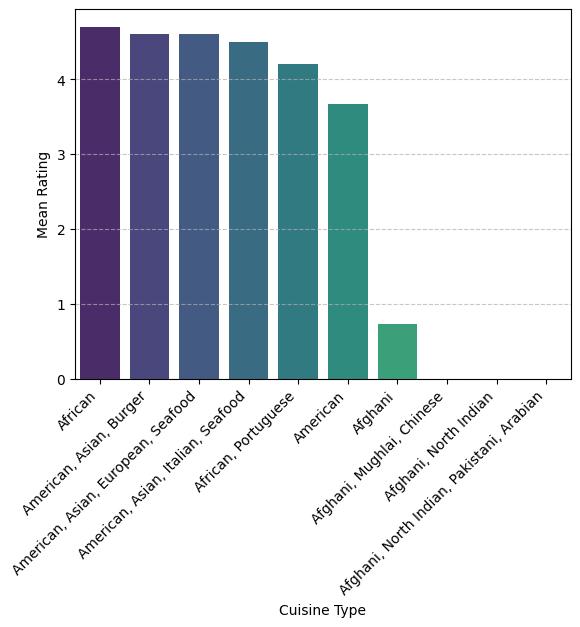

In [ ]:
sns.barplot(data=cuisine_ratings_top_sort,x='Cuisines', y='Aggregate rating', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
cuisine_votes = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print(cuisine_votes.head(5))

Cuisines
North Indian, Mughlai    53747
North Indian             46241
North Indian, Chinese    42012
Cafe                     30657
Chinese                  21925
Name: Votes, dtype: int64


In [ ]:
top_cuisine_name = cuisine_votes.sort_values(ascending=False).index[0]
print(f"Most popular based on number of votes : {top_cuisine_name}")

Most popular based on number of votes : North Indian, Mughlai


**Level 3 - Task 3**

# Data Visualization ( Task 3 )

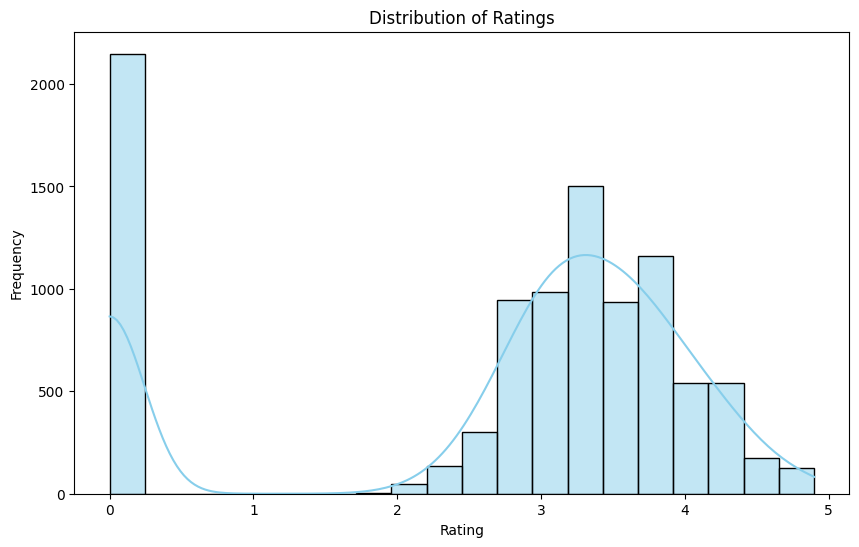

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

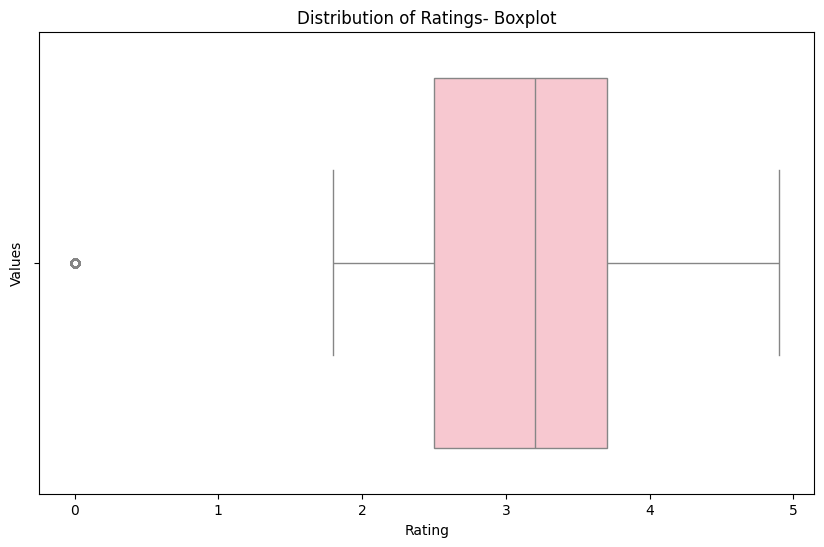

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aggregate rating', data=data, color='pink')
plt.title('Distribution of Ratings- Boxplot')
plt.xlabel('Rating')
plt.ylabel('Values')
plt.show()

<ipython-input-35-6be9ae375726>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Aggregate rating", data=data, palette="viridis")


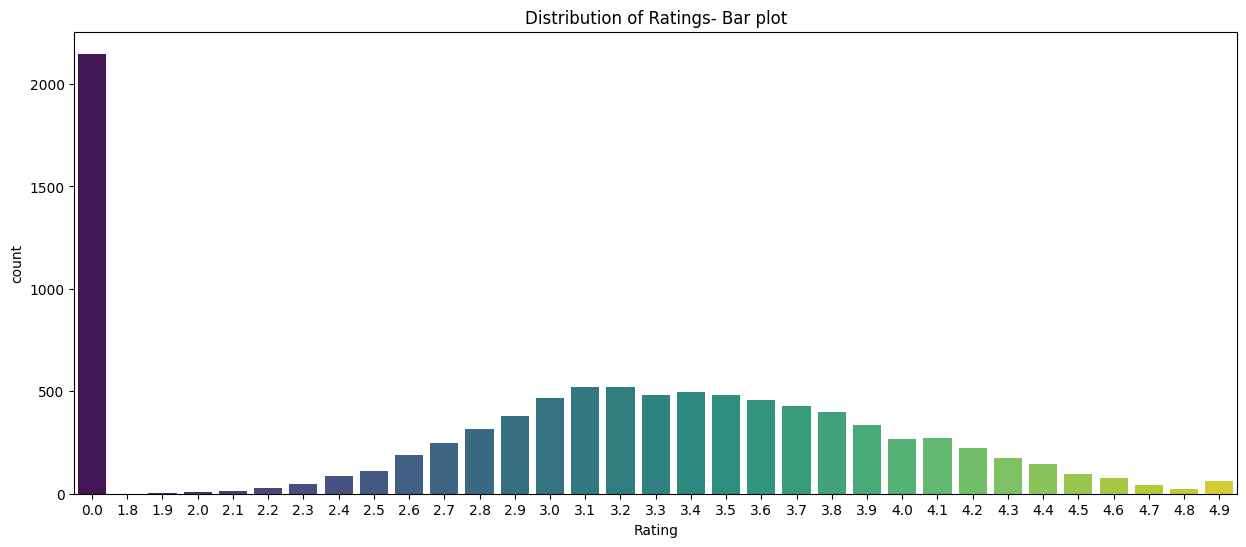

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Aggregate rating", data=data, palette="viridis")
plt.title('Distribution of Ratings- Bar plot')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

In [ ]:
avg_rating_cuisines = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index().head(15).sort_values(by='Aggregate rating', ascending=False)
avg_rating_cuisines

,Cuisines,Aggregate rating
13,"American, BBQ, Sandwich",4.900000
4,African,4.700000
7,"American, Asian, Burger",4.600000
8,"American, Asian, European, Seafood",4.600000
9,"American, Asian, Italian, Seafood",4.500000
5,"African, Portuguese",4.200000
12,"American, BBQ, Burger",3.850000
11,"American, BBQ",3.800000
6,American,3.667742
10,"American, Asian, North Indian, Mexican, South ...",3.300000


<ipython-input-37-395a7b702049>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_cuisines, x='Cuisines', y='Aggregate rating', palette='viridis')


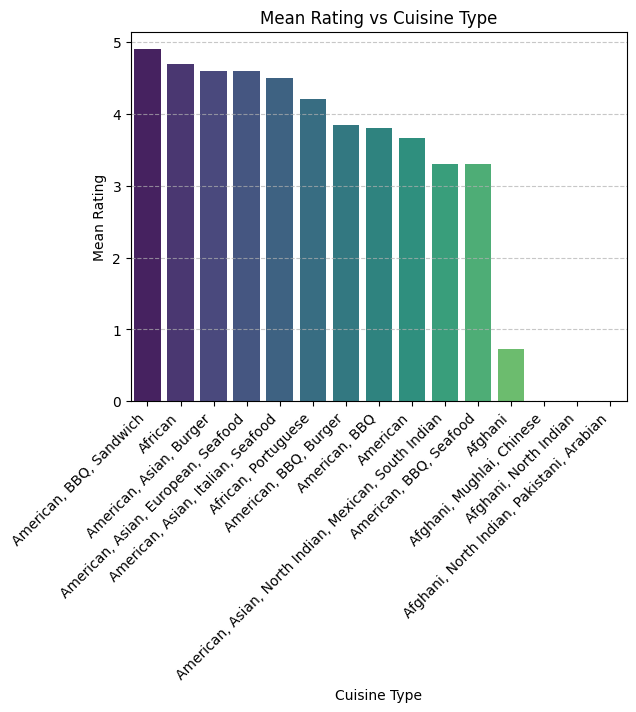

In [ ]:
sns.barplot(data=avg_rating_cuisines, x='Cuisines', y='Aggregate rating', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Rating vs Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
avg_rating_cities = data.groupby('City')['Aggregate rating'].mean().reset_index().head(15).sort_values(by='Aggregate rating', ascending=False)
avg_rating_cities

,City,Aggregate rating
14,Bangalore,4.375000
6,Ankara,4.305000
0,Abu Dhabi,4.300000
9,Auckland,4.275000
8,Athens,4.200000
13,Bandung,4.200000
2,Ahmedabad,4.161905
10,Augusta,4.130000
1,Agra,3.965000
5,Amritsar,3.685714


<ipython-input-39-7efa79e2b5cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_cities, x='City', y='Aggregate rating', palette='viridis')


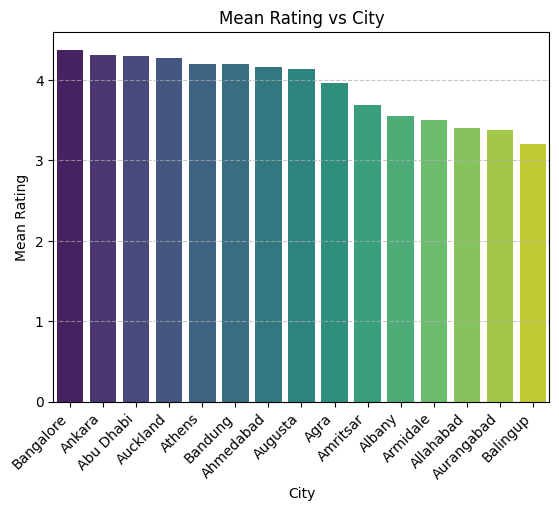

In [ ]:
sns.barplot(data=avg_rating_cities, x='City', y='Aggregate rating', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Rating vs City')
plt.xlabel('City')
plt.ylabel('Mean Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

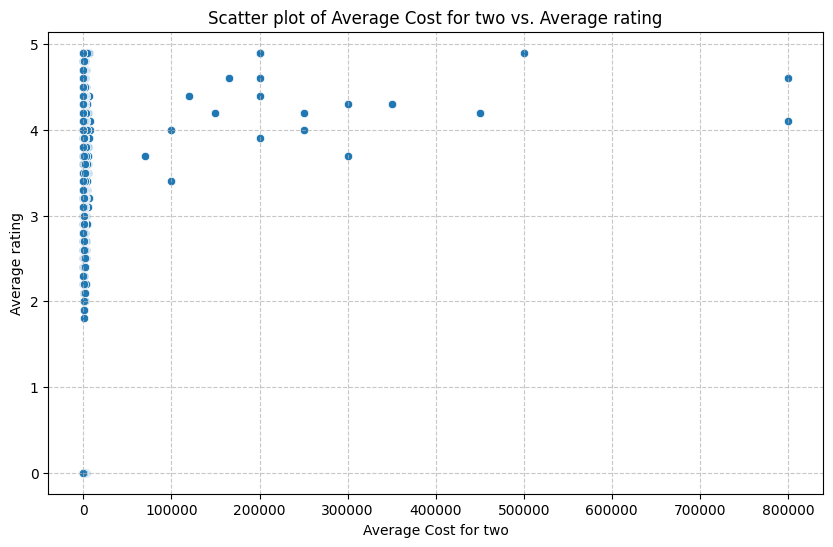

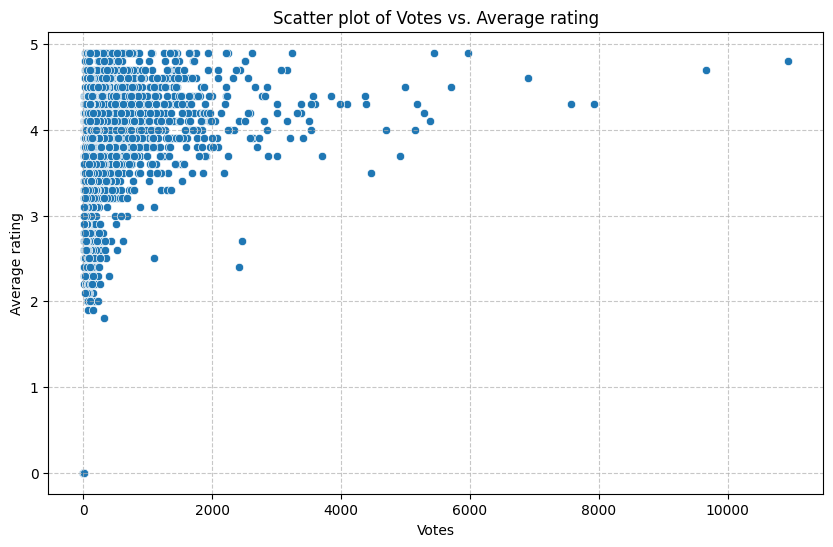

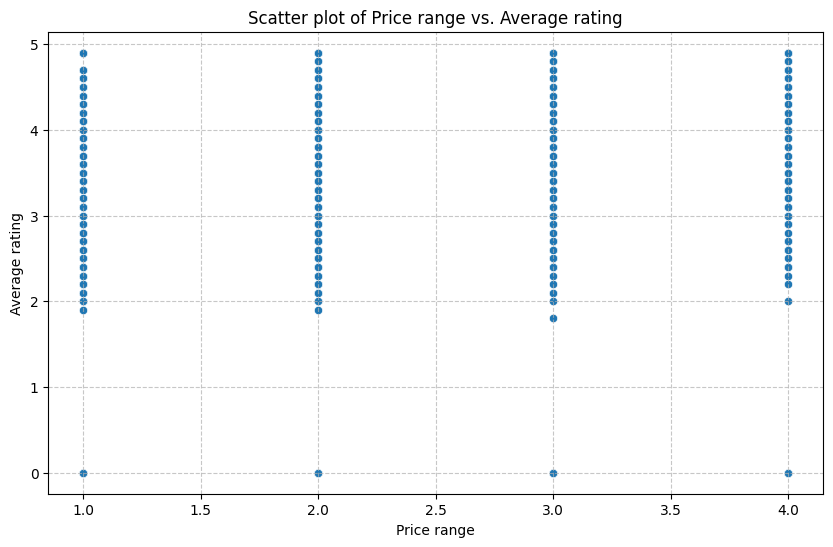

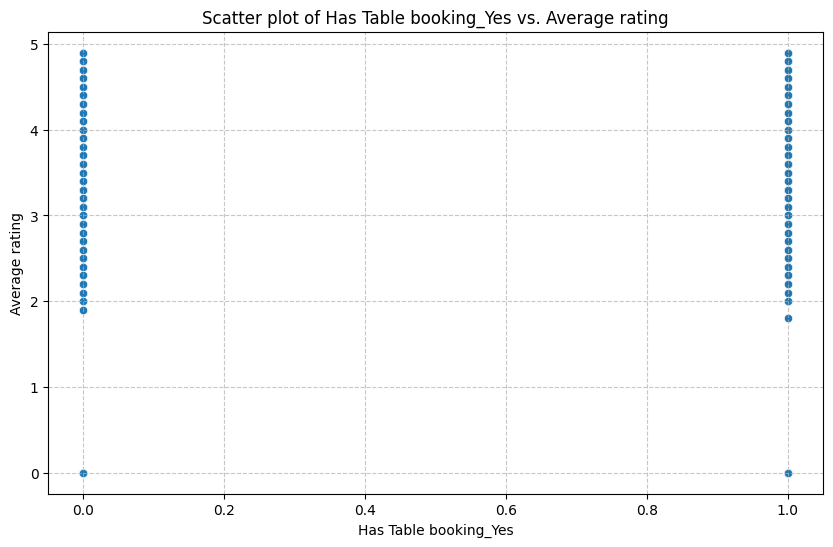

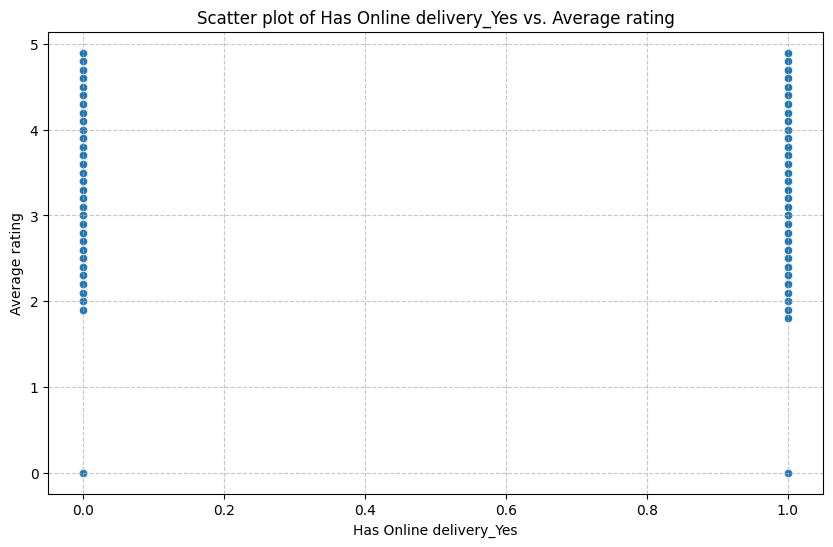

In [ ]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f"Scatter plot of {feature} vs. Average rating")
    plt.xlabel(feature)
    plt.ylabel("Average rating")
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()